In [1]:
# import tensorflow library dan cek versi tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# mempersiapkan dataset
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-08-08 14:22:23--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2021-08-08 14:22:23--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   224MB/s    in 0.3s    

2021-08-08 14:22:26 

In [3]:
# melakukan ekstraksi dataset dan mendifinisikan nama direktori untuk data latih dan data validasi
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train') # direktori data latih
validation_dir = os.path.join(base_dir, 'val') # direktori data validasi

In [4]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [5]:
# membuat sebuah objek ImageDataGenerator
# untuk data training dan data testing. Image data generator adalah sebuah fungsi yang sangat berguna untuk 
# mempersiapkan data latih dan data testing yang akan diberikan ke model. 
# Beberapa kemudahan yang disediakan Image data generator adalah, preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [6]:
# Lalu kita dapat menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model.
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
# arsitektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 33s - loss: 0.7310 - accuracy: 0.5400 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 1s - loss: 0.6924 - accuracy: 0.5400 - val_loss: 0.6824 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 1s - loss: 0.6934 - accuracy: 0.4600 - val_loss: 0.6747 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 1s - loss: 0.6748 - accuracy: 0.6100 - val_loss: 0.6133 - val_accuracy: 0.7500
Epoch 5/20
25/25 - 1s - loss: 0.5782 - accuracy: 0.7500 - val_loss: 0.8043 - val_accuracy: 0.6000
Epoch 6/20
25/25 - 1s - loss: 0.7422 - accuracy: 0.5200 - val_loss: 0.6734 - val_accuracy: 0.6500
Epoch 7/20
25/25 - 1s - loss: 0.6719 - accuracy: 0.6500 - val_loss: 0.6302 - val_accuracy: 0.6000
Epoch 8/20
25/25 - 1s - loss: 0.6410 - accuracy: 0.6200 - val_loss: 0.6357 - val_accuracy: 0.5500
Epoch 9/20
25/25 - 1s - loss: 0.5944 - accuracy: 0.7300 - val_loss: 0.4747 - val_accuracy: 0.7500
Epoch 10/20
25/25 - 1s - loss: 0.5078 - accuracy: 0.8100 - val_loss: 0.4613 - val_accuracy: 0.7500
Epoch 11/20
25/25 

Saving 7jvnrhhnfws41.jpg to 7jvnrhhnfws41.jpg
7jvnrhhnfws41.jpg
messy


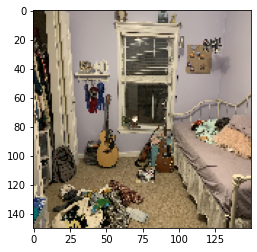

In [10]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')